In [412]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Read data and plot it

In [413]:
iris = load_iris()
X = iris.data
y = iris.target

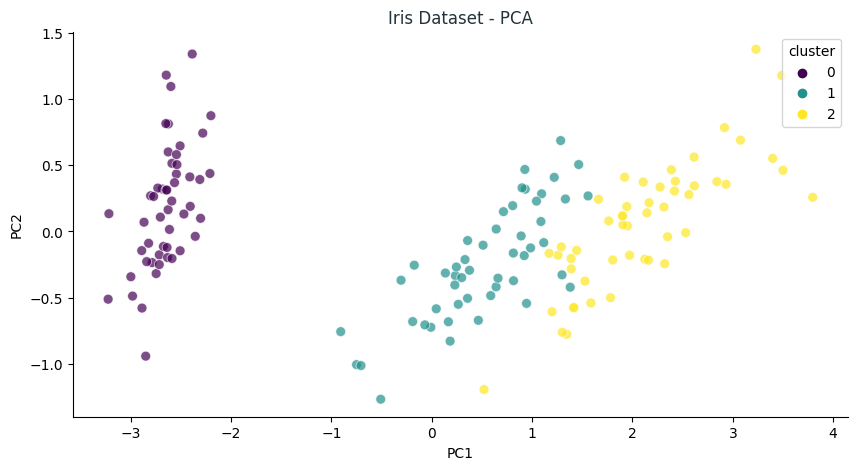

In [438]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['PC1', 'PC2']
X_pca['cluster'] = y

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Iris Dataset - PCA', fontsize=12, color="#22333b")
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=X_pca, palette='viridis', alpha=0.7, s=50, ax=ax)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

# Fitness, Mutation, and Crossover functions

In [414]:
def fitness_calc(X, gen):
    num_clusters = int(gen[150])
    gen = gen[:150]
    sum = 0
    for i in range(num_clusters):
        mask = np.where(gen != i)
        cluster = np.delete(X, mask, 0)
        cluster = np.array(cluster)
        mean = np.mean(cluster, axis=0)
        distance = np.abs(cluster - mean)
        distance = np.sum(distance, axis=1)
        distance = np.sum(distance)
        sum += distance
    
    return sum 

def mutation(gen):
    rand = random.randint(0, 149)
    gen[rand] = np.random.randint(0, gen[150])
    return gen

def crossover(gen1, gen2):
    rand = random.randint(1,149)
    gen3 = np.concatenate((gen1[0:rand], gen2[rand:151]), axis=0)
    gen4 = np.concatenate((gen2[0:rand], gen1[rand:151]), axis=0)
    return gen3, gen4

def crossover2 (gen1, gen2):
    child1 = []
    child2 = []
    for i in range(0, 151):
        if random.random() < 0.5:
            child1.append(gen1[i])
        else:
            child1.append(gen2[i])
        if random.random() < 0.5:
            child2.append(gen1[i])
        else:
            child2.append(gen2[i])
    
    return np.array(child1), np.array(child2)

# Genetic Algorithm

In [415]:
def genetic_algorithm(population, mutation_rate, X, num_generations):
    fitness = []
    for i in range(len(population)):
        fitness.append(fitness_calc(X, population[i]))
    fitness = np.array(fitness)
    population = np.array(population)
    fitness = np.reshape(fitness, (len(population), 1))
    population = np.concatenate((population, fitness), axis=1)
    population = population[population[:, 151].argsort()]

    if num_generations % 5 == 0:
        print(f'Generation :{num_generations}\n Population : {len(population)} \n Best fitness: {population[0][151]} \
            \n Mean fitness: {np.mean(population[:, 151])} \n Worst fitness: {population[len(population)-1][151]} \
             \n Best number of clusters: {population[0][150]} \n ---------------------------------')
        
    population = population[0:50]
    childs = []
    for i in range(len(population)):
        for j in range(i, len(population)):
            if population[i][150] == population[j][150] and i != j:
                child1, child2 = crossover(population[i], population[j])
                if random.random() < mutation_rate:
                    child1 = mutation(child1)
                childs.append(child1)
                if random.random() < mutation_rate:
                    child2 = mutation(child2)
                childs.append(child2)

    childs = np.array(childs)
    population = population[:, 0:151]
    population = np.concatenate((population, childs), axis=0)
    return population


# Maximum cluster size 8

In [461]:
population = []
for i in range(200):
    n = random.randint(1, 8)
    population.append(np.random.randint(0, n, size=(151)))
    population[i][150] = n
    
for i in range(101):
    population = genetic_algorithm(population, 0.02, X, i)
    

Generation :0
 Population : 200 
 Best fitness: 452.78068181818185             
 Mean fitness: 478.579655327055 
 Worst fitness: 487.0704309643844              
 Best number of clusters: 8.0 
 ---------------------------------
Generation :5
 Population : 2500 
 Best fitness: 361.5549841269841             
 Mean fitness: 379.36281775524765 
 Worst fitness: 398.9783722943723              
 Best number of clusters: 8.0 
 ---------------------------------
Generation :10
 Population : 2500 
 Best fitness: 321.0447246670188             
 Mean fitness: 329.1283188971739 
 Worst fitness: 341.60013840621616              
 Best number of clusters: 8.0 
 ---------------------------------
Generation :15
 Population : 2500 
 Best fitness: 291.28971872543485             
 Mean fitness: 298.18666801169667 
 Worst fitness: 311.000390459214              
 Best number of clusters: 8.0 
 ---------------------------------
Generation :20
 Population : 2500 
 Best fitness: 270.53397783461213             
 M

In [ ]:
y_pred_max8 = population[0][0:150]
y_pred_max8 = np.array(y_pred_max8)
y_pred_max8 = y_pred_max8.astype(int)

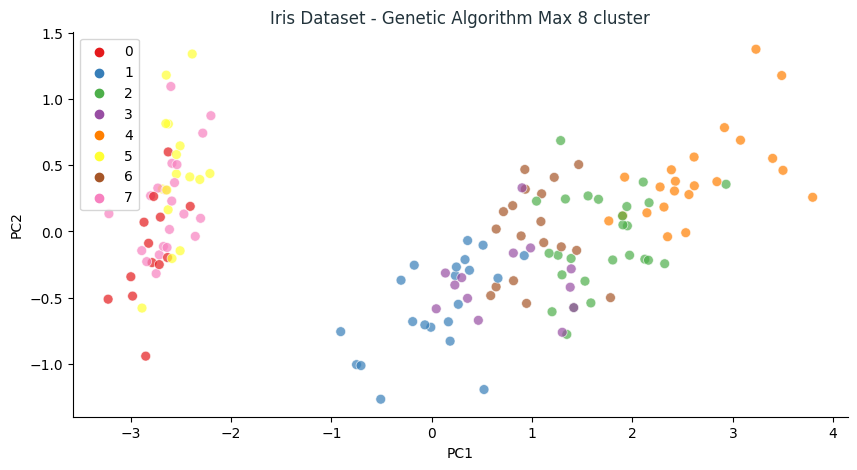

In [463]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Iris Dataset - Genetic Algorithm Max 8 cluster', fontsize=12, color="#22333b")
sns.scatterplot(x='PC1', y='PC2', hue=y_pred_max8, data=X_pca, palette='Set1', alpha=0.7, s=50, ax=ax)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

# Maximum Cluster size 5

In [443]:
population = []
for i in range(200):
    n = random.randint(1, 5)
    population.append(np.random.randint(0, n, size=(151)))
    population[i][150] = n
    
for i in range(101):
    population = genetic_algorithm(population, 0.02, X, i)
    

Generation :0
 Population : 200 
 Best fitness: 455.4705966529226             
 Mean fitness: 481.90523868444654 
 Worst fitness: 487.6333036191835              
 Best number of clusters: 5.0 
 ---------------------------------
Generation :5
 Population : 1378 
 Best fitness: 404.21631006006015             
 Mean fitness: 423.1188521641239 
 Worst fitness: 445.77764209928              
 Best number of clusters: 5.0 
 ---------------------------------
Generation :10
 Population : 2500 
 Best fitness: 357.31428341384867             
 Mean fitness: 366.4641696634287 
 Worst fitness: 378.9875510962468              
 Best number of clusters: 5.0 
 ---------------------------------
Generation :15
 Population : 2500 
 Best fitness: 319.9015620321708             
 Mean fitness: 333.543825886196 
 Worst fitness: 351.490083028083              
 Best number of clusters: 5.0 
 ---------------------------------
Generation :20
 Population : 2500 
 Best fitness: 298.6384758661061             
 Mean f

In [444]:
y_pred_max5 = population[0][0:150]
y_pred_max5 = np.array(y_pred_max5)
y_pred_max5 = y_pred_max5.astype(int)

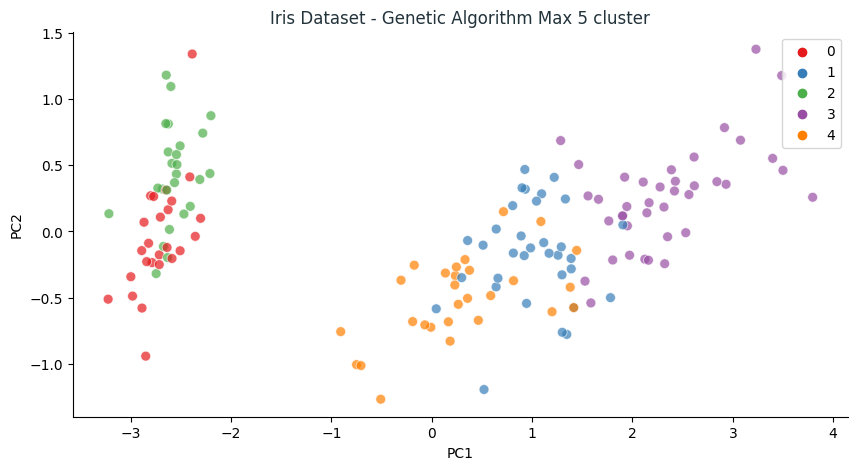

In [446]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Iris Dataset - Genetic Algorithm Max 5 cluster', fontsize=12, color="#22333b")
sns.scatterplot(x='PC1', y='PC2', hue=y_pred_max5, data=X_pca, palette='Set1', alpha=0.7, s=50, ax=ax)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

# Maximum Cluster size 3

In [447]:
population = []
for i in range(200):
    n = random.randint(1, 3)
    population.append(np.random.randint(0, n, size=(151)))
    population[i][150] = n
    
for i in range(101):
    population = genetic_algorithm(population, 0.02, X, i)
    

Generation :0
 Population : 200 
 Best fitness: 470.3360906311815             
 Mean fitness: 484.88012827378924 
 Worst fitness: 487.0518159806296              
 Best number of clusters: 2.0 
 ---------------------------------
Generation :5
 Population : 2500 
 Best fitness: 415.48841504642223             
 Mean fitness: 433.1796674166892 
 Worst fitness: 451.6077507598784              
 Best number of clusters: 3.0 
 ---------------------------------
Generation :10
 Population : 2500 
 Best fitness: 361.087974025974             
 Mean fitness: 375.0275068998903 
 Worst fitness: 396.1534798534798              
 Best number of clusters: 3.0 
 ---------------------------------
Generation :15
 Population : 2500 
 Best fitness: 321.7003663003663             
 Mean fitness: 332.3168380165753 
 Worst fitness: 346.76559714795              
 Best number of clusters: 3.0 
 ---------------------------------
Generation :20
 Population : 2500 
 Best fitness: 290.31544467243884             
 Mean 

In [448]:
y_pred_max3 = population[0][0:150]
y_pred_max3 = np.array(y_pred_max3)
y_pred_max3 = y_pred_max3.astype(int)

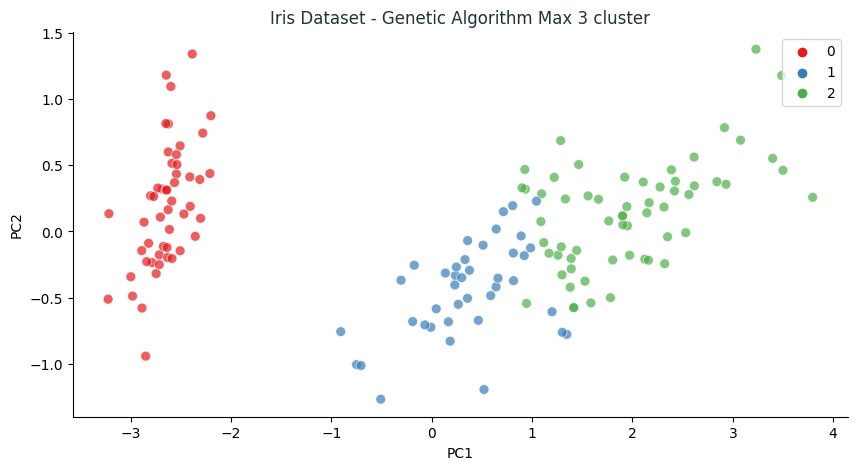

In [449]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Iris Dataset - Genetic Algorithm Max 3 cluster', fontsize=12, color="#22333b")
sns.scatterplot(x='PC1', y='PC2', hue=y_pred_max3, data=X_pca, palette='Set1', alpha=0.7, s=50, ax=ax)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

# Plotting the clusters and real classes

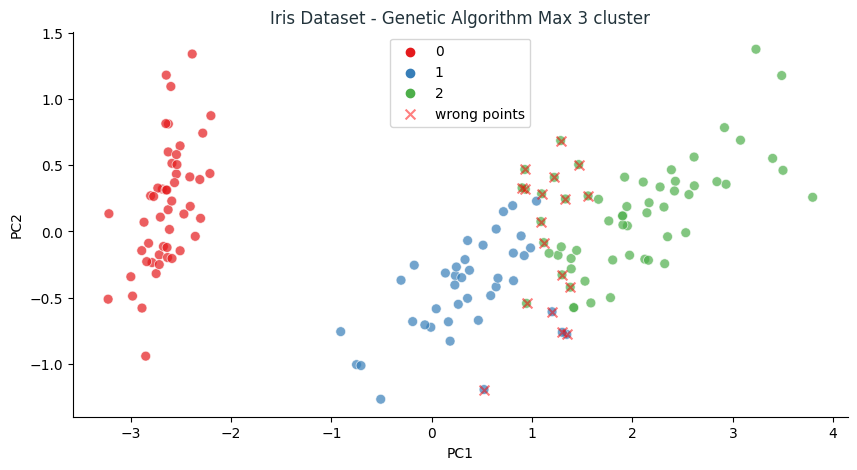

In [460]:
mask = np.where(y_pred_max3 == y)
wrong = np.delete(X_pca, mask, 0)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Iris Dataset - Genetic Algorithm Max 3 cluster', fontsize=12, color="#22333b")
sns.scatterplot(x='PC1', y='PC2', hue=y_pred_max3, data=X_pca, palette='Set1', alpha=0.7, s=50, ax=ax)
ax.scatter(wrong[:, 0], wrong[:, 1], c='red', alpha=0.5, s=50, marker='x', label='wrong points')
ax.legend(loc='upper center')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()